# 1. Kaggle에서 데이터셋 다운로드

In [10]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashishkumarak/netflix-reviews-playstore-daily-updated")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\jh838\.cache\kagglehub\datasets\ashishkumarak\netflix-reviews-playstore-daily-updated\versions\170


In [24]:
import pandas as pd

#데이터셋 불러오기
df=pd.read_csv(path + "\\netflix_reviews.csv")

In [26]:
#데이터프레임의 상단 5개 데이터 출력
df.head(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5f109900-7485-4333-8317-44251899fc83,Siddiqui Alkasim,Good 😊,5,0,8.137.0 build 4 50942,2024-10-26 13:41:01,8.137.0 build 4 50942
1,68174e16-f4a3-48f8-b0e7-f60840800d71,Binher Bilal,App acha hai lkin isne mere acc se khud paise ...,1,0,8.137.0 build 4 50942,2024-10-26 13:03:47,8.137.0 build 4 50942
2,b95c7685-cf4c-4a13-a8ce-798ec921fc84,Gabriella Guzman,Poop,5,0,8.137.0 build 4 50942,2024-10-26 13:01:15,8.137.0 build 4 50942
3,f3fb3677-8220-439e-8500-403b5378e04e,archie arreola,Poor,1,0,8.137.0 build 4 50942,2024-10-26 13:00:50,8.137.0 build 4 50942
4,45243bcb-120b-4dd4-acfa-9ae16197242e,Mzokhona Mthethwa,It is just the best app you could rely on,5,0,NaN,2024-10-26 12:57:57,NaN


In [28]:
#데이터프레임의 하단 5개 데이터 출력
df.tail(5)

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
117539,a760ead9-e7aa-4ed1-a651-5c37c3600dac,A Google user,i really like it! there are so many movies and...,5,0,NaN,2019-08-03 15:06:03,NaN
117540,4957f9e7-d7f4-4a52-9764-031cebcac83f,Captain Jeoy,I love Netflix. I always enjoy my time using it.,5,0,8.34.0 build 4 50250,2022-08-15 16:16:30,8.34.0 build 4 50250
117541,9acf7586-7abf-4b50-8c50-3ede3b2a42c4,Suryansh,Sound quality is very slow of movies,1,0,NaN,2020-08-17 07:26:58,NaN
117542,32870f7f-c461-4256-b602-75244ca60248,A Google user,Rate is very expensive.. bcos we see netflix s...,1,0,7.17.0 build 13 34346,2019-07-21 09:41:42,7.17.0 build 13 34346
117543,dc1352e9-10a8-41ca-ab23-05d045b08e90,suraj soni,"this app is awesome for english movies ,series...",4,0,NaN,2020-05-24 11:04:08,NaN


In [30]:
#데이터프레임의 column과 shape 출력
print("Shape of the dataset:", df.shape)
print("Columns in the dataset:",df.columns)

Shape of the dataset: (117544, 8)
Columns in the dataset: Index(['reviewId', 'userName', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'appVersion'],
      dtype='object')


# 2. 데이터 전처리

In [37]:
import re

# 전처리 함수
def preprocess_text(text):
    if isinstance(text, float):
        return ""
    text = text.lower()  # 대문자를 소문자로
    text = re.sub(r'[^\w\s]', '', text)  # 구두점 제거
    text = re.sub(r'\d+', '', text)  # 숫자 제거
    text = text.strip()  # 띄어쓰기 제외하고 빈 칸 제거
    return text

df.content = df.content.apply(preprocess_text)
df.head()

,reviewId,userName,content,score,thumbsUpCount,reviewCreatedVersion,at,appVersion
0,5f109900-7485-4333-8317-44251899fc83,Siddiqui Alkasim,good,5,0,8.137.0 build 4 50942,2024-10-26 13:41:01,8.137.0 build 4 50942
1,68174e16-f4a3-48f8-b0e7-f60840800d71,Binher Bilal,app acha hai lkin isne mere acc se khud paise ...,1,0,8.137.0 build 4 50942,2024-10-26 13:03:47,8.137.0 build 4 50942
2,b95c7685-cf4c-4a13-a8ce-798ec921fc84,Gabriella Guzman,poop,5,0,8.137.0 build 4 50942,2024-10-26 13:01:15,8.137.0 build 4 50942
3,f3fb3677-8220-439e-8500-403b5378e04e,archie arreola,poor,1,0,8.137.0 build 4 50942,2024-10-26 13:00:50,8.137.0 build 4 50942
4,45243bcb-120b-4dd4-acfa-9ae16197242e,Mzokhona Mthethwa,it is just the best app you could rely on,5,0,NaN,2024-10-26 12:57:57,NaN


# 3. Feature 분석(EDA)

In [41]:
import seaborn as sns  # 그래프를 그리기 위한 seaborn 라이브러리 임포트 
import matplotlib.pyplot as plt  # 그래프 표시를 위한 pyplot 임포트

C:\Users\jh838\AppData\Local\Temp\ipykernel_9120\3620948905.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='score', palette='tab10')


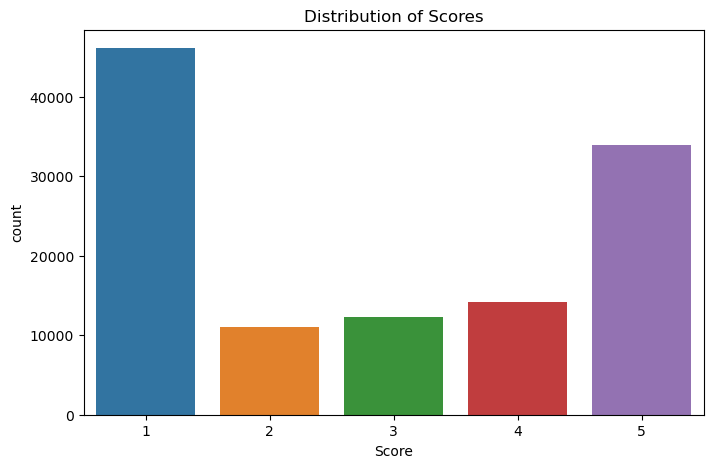

In [59]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='score', palette='tab10')
plt.xlabel("Score")
plt.ylabel("count")
plt.title('Distribution of Scores')
plt.show()